In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

In [2]:
%matplotlib inline

In [3]:
summary = pd.read_csv('atussum_2014.dat')
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11592 entries, 0 to 11591
Columns: 409 entries, tucaseid to t500107
dtypes: float64(1), int64(408)
memory usage: 36.3 MB


In [4]:
summary.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
0,20140101140007,4891315.826760,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,23147368.359655,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,20941823.429044,2,65,2,38,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2505899.417166,-1,50,2,39,2,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,15928231.823165,8,23,2,39,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0


In [5]:
summary.columns

Index(['tucaseid', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA',
       'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS', 
       ...
       't181601', 't181699', 't181801', 't181899', 't189999', 't500101',
       't500103', 't500105', 't500106', 't500107'],
      dtype='object', length=409)

In [6]:
list(summary.columns)

['tucaseid',
 'TUFINLWGT',
 'TRYHHCHILD',
 'TEAGE',
 'TESEX',
 'PEEDUCA',
 'PTDTRACE',
 'PEHSPNON',
 'GTMETSTA',
 'TELFS',
 'TEMJOT',
 'TRDPFTPT',
 'TESCHENR',
 'TESCHLVL',
 'TRSPPRES',
 'TESPEMPNOT',
 'TRERNWA',
 'TRCHILDNUM',
 'TRSPFTPT',
 'TEHRUSLT',
 'TUDIARYDAY',
 'TRHOLIDAY',
 'TRTEC',
 'TRTHH',
 't010101',
 't010102',
 't010201',
 't010299',
 't010301',
 't010399',
 't010401',
 't010501',
 't019999',
 't020101',
 't020102',
 't020103',
 't020104',
 't020199',
 't020201',
 't020202',
 't020203',
 't020301',
 't020302',
 't020303',
 't020399',
 't020401',
 't020402',
 't020499',
 't020501',
 't020502',
 't020599',
 't020601',
 't020602',
 't020699',
 't020701',
 't020799',
 't020801',
 't020901',
 't020902',
 't020903',
 't020904',
 't020905',
 't020999',
 't029999',
 't030101',
 't030102',
 't030103',
 't030104',
 't030105',
 't030106',
 't030108',
 't030109',
 't030110',
 't030111',
 't030112',
 't030199',
 't030201',
 't030202',
 't030203',
 't030299',
 't030301',
 't030302',
 

In [14]:
# handy function to summarize our data

def activity_by_age(df, activity_code, subsample=True):
    activity_col_name = 't{}'.format(activity_code)
    df = df[['TUFINLWGT', 'TEAGE', activity_col_name]]
    df = df.rename(columns={'TUFINLWGT': 'weight', 'TEAGE': 'age', activity_col_name: 'minutes'})
    if subsample:
        df = df[df.age % 5 == 0]
    df['weighted_minutes'] = df.weight * df.minutes
    df = df.groupby('age').sum()
    df['mean_minutes'] = df.weighted_minutes / df.weight
    df = df[['mean_minutes']]
    return df

The code for Medical Care is `080401`.

let's look at the data for medical care

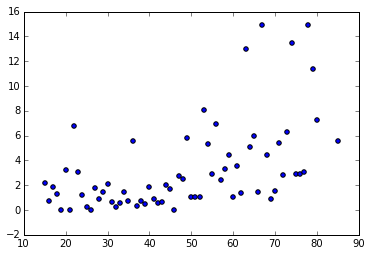

In [16]:
medical_care = activity_by_age(summary, '080401', subsample=False)

plt.scatter(medical_care.index, medical_care.mean_minutes)

# Linear Regression

Linear regression is the process of finding a line that describes the relationship between _features_ such that given a known variable we can make a prediction about an unknown variable.

Or as wikipedia says:
> In linear regression, data are modeled using linear predictor functions, and unknown model parameters are estimated from the data 

If our predictor function is steeper or shallower than the actual results, we won't get a good prediction of the data. One way to get a quick idea of how well a predictor function works is to graph it on top of our data


In [19]:
def linear_least_squares(df, fn):
    estimated_values = df.index.map(fn)
    diffs = df.mean_minutes - estimated_values
    diffs_squared = diffs ** 2
    return diffs_squared.sum() / (2 * len(diffs))

The function above applies the predictor function to the actual set of data we've got, computes the difference between the estimate and the actual data, squares it, sums it, divides it by 2 * # of elements, and this gives us a number

It needs to be a passed a function that is supposed to predict the estimates given the # of years

We can pass it lambda functions that are like simple slope + y-intercept

46.8044012289


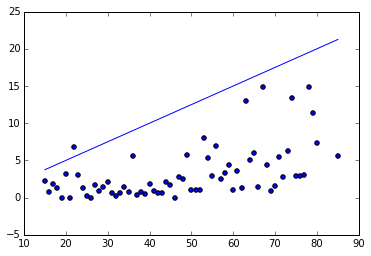

In [20]:
attempt1 = lambda x: 0.25 * x + 0

print(linear_least_squares(medical_care, attempt1))

plt.scatter(medical_care.index, medical_care.mean_minutes)
plt.plot(medical_care.index, attempt1(medical_care.index))

8.31090435076


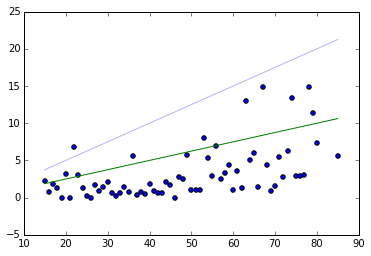

In [21]:
attempt2 = lambda x: 0.125 * x + 0

print(linear_least_squares(medical_care, attempt2))

plt.scatter(medical_care.index, medical_care.mean_minutes)
plt.plot(medical_care.index, attempt1(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt2(medical_care.index))

4.67311380848


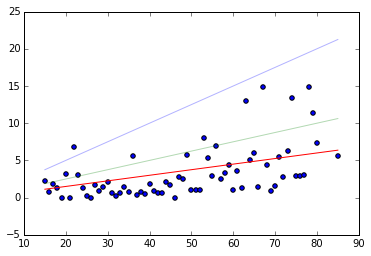

In [22]:
attempt3 = lambda x: 0.075 * x + 0

print(linear_least_squares(medical_care, attempt3))

plt.scatter(medical_care.index, medical_care.mean_minutes)
plt.plot(medical_care.index, attempt1(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt2(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt3(medical_care.index))

4.65110303914


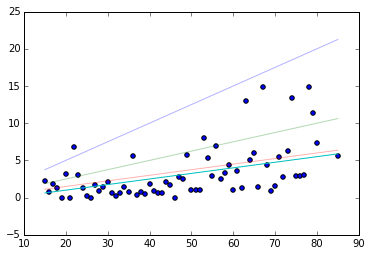

In [28]:
attempt4 = lambda x: 0.075 * x - 0.5

print(linear_least_squares(medical_care, attempt4))

plt.scatter(medical_care.index, medical_care.mean_minutes)
plt.plot(medical_care.index, attempt1(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt2(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt3(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt4(medical_care.index))

12.0037304721


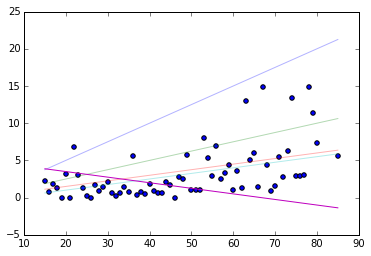

In [30]:
attempt5 = lambda x: -0.075 * x + 5

print(linear_least_squares(medical_care, attempt5))

plt.scatter(medical_care.index, medical_care.mean_minutes)
plt.plot(medical_care.index, attempt1(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt2(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt3(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt4(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt5(medical_care.index))

While it's tons of fun to tweak slopes and y-intercepts, it's not a practical use of our time. Thankfully, there is a library to do what we were doing.

Using LinearRegression(), we can have scikit_learn come up with a linear best fit for our data.

In [34]:
regression = linear_model.LinearRegression()
# transpose our data
transposed_index = np.array(medical_care.index.values).reshape(-1, 1)

regression.fit(transposed_index, medical_care.mean_minutes.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
help(regression.fit)

Help on method fit in module sklearn.linear_model.base:

fit(X, y, n_jobs=1) method of sklearn.linear_model.base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : numpy array or sparse matrix of shape [n_samples,n_features]
        Training data
    
    y : numpy array of shape [n_samples, n_targets]
        Target values
    
    Returns
    -------
    self : returns an instance of self.



In [37]:
regression.predict(63)

array([ 4.7696473])

In [38]:
regression.predict(10)

array([-0.40676435])

In [39]:
print(regression.coef_, regression.intercept_)

[ 0.09766814] -1.38344578893


4.53272771457


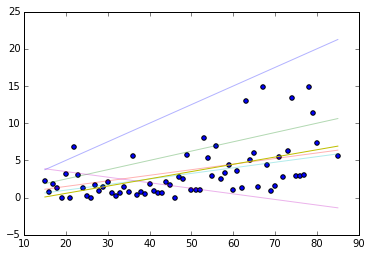

In [42]:
attempt6 = lambda x: regression.predict(x)[0]
print(linear_least_squares(medical_care, attempt6))

plt.scatter(medical_care.index, medical_care.mean_minutes)
plt.plot(medical_care.index, attempt1(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt2(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt3(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt4(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, attempt5(medical_care.index), alpha=0.3)
plt.plot(medical_care.index, [attempt6(x) for x in medical_care.index])

In [44]:
regression.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [45]:
regression.score(transposed_index, medical_care.mean_minutes.values)

0.28465800587836465